# Sales Data Clustering: K-Means and Hierarchical

### Objective:
- Cluster sales data to identify groups of similar orders or products. 
- Determine optimal number of clusters using K-Means Elbow Method, visualize clusters, and optionally perform hierarchical clustering for comparison.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

### Step 1: Load Dataset

In [3]:
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
df.shape

(2823, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [14]:
#Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


### Step 2: Preprocess Numeric Features
- Select numeric columns relevant for clustering
- Handle missing values
- Standardize features


In [15]:
# Numeric features selected for clustering
numeric_cols = ['QUANTITYORDERED', 'PRICEEACH', 'SALES']

# Drop rows with missing values in these columns
X = df[numeric_cols].dropna()

In [16]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape of scaled data:", X_scaled.shape)

Shape of scaled data: (2823, 3)


In [ ]:
# Fill missing values with median
df_numeric = df_numeric.fillna(df_numeric.median())

In [12]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)
X_scaled.shape

(2823, 7)

### Step 3: Exploratory Visualization
- Scatter plots of features to understand relationships
- Correlation heatmap

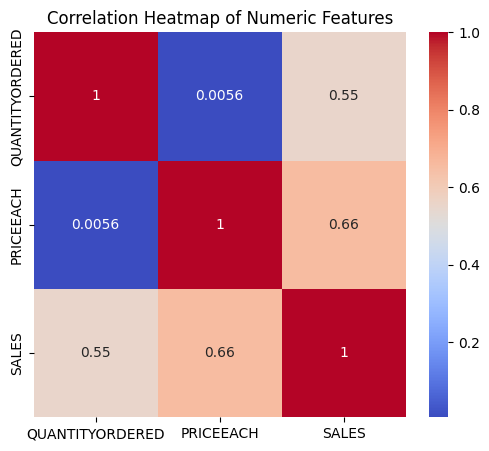

In [17]:
# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(pd.DataFrame(X_scaled, columns=numeric_cols).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


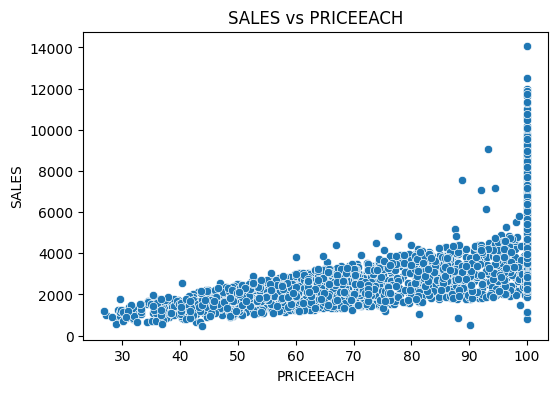

In [18]:
# Scatter plot example: SALES vs PRICEEACH
plt.figure(figsize=(6,4))
sns.scatterplot(x=X['PRICEEACH'], y=X['SALES'])
plt.title("SALES vs PRICEEACH")
plt.show()

### Step 4: K-Means Clustering
- Determine optimal number of clusters using Elbow Method
- Fit K-Means and assign cluster labels
- Visualize clusters using PCA

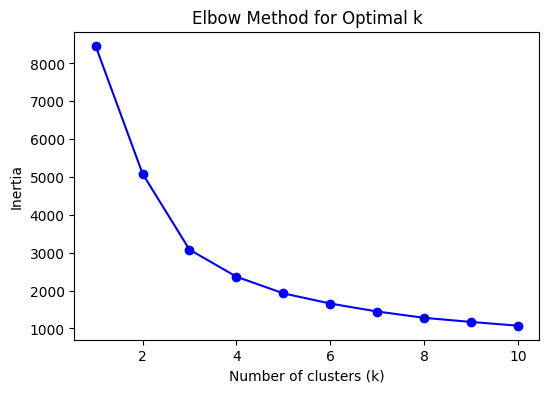

In [19]:
# Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(6,4))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

### Step 5: Fit K-Means with chosen k
- Assign clusters to original data
- Visualize in 2D using PCA

In [ ]:
# Choose optimal k (k=4 from elbow plot)
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
X['cluster'] = kmeans.fit_predict(X_scaled)

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


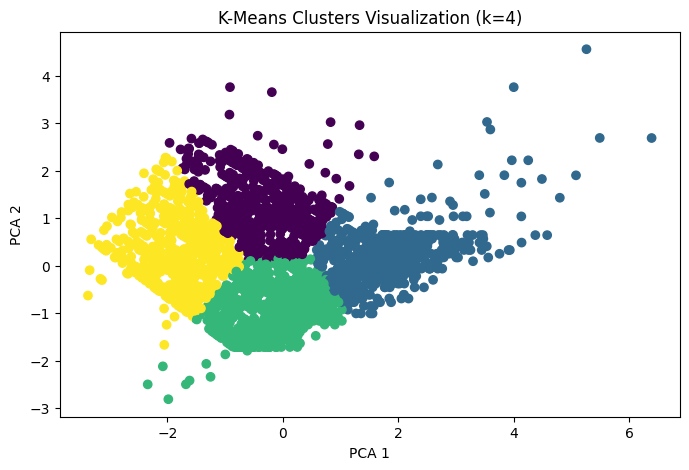

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=X['cluster'], cmap='viridis', marker='o')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title(f"K-Means Clusters Visualization (k={k_optimal})")
plt.show()

In [24]:
# Choose optimal k (k=3 from elbow plot)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
X['cluster'] = kmeans.fit_predict(X_scaled)

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


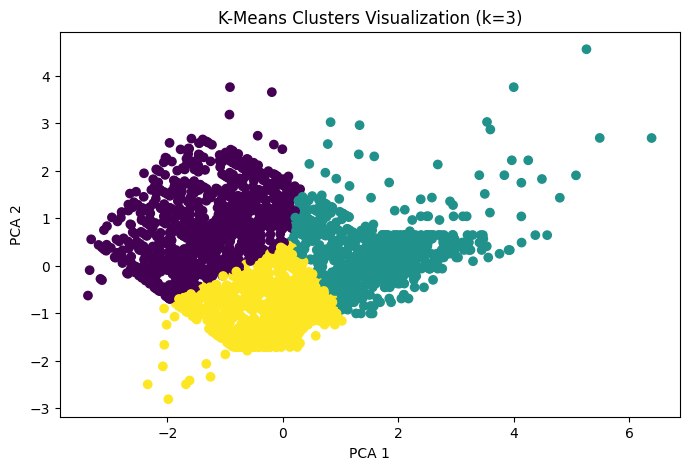

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=X['cluster'], cmap='viridis', marker='o')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title(f"K-Means Clusters Visualization (k={k_optimal})")
plt.show()

### Step 6: Hierarchical Clustering
- Visualize dendrogram
- Form clusters

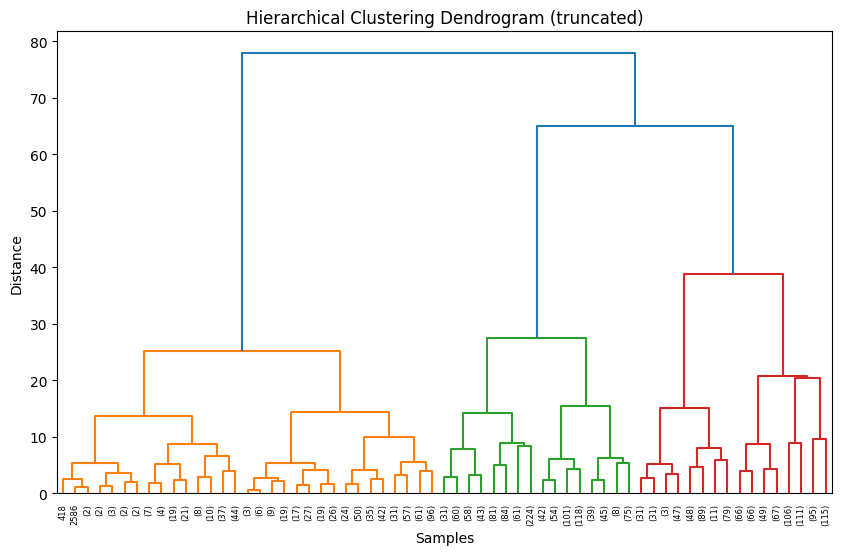

In [22]:
# Compute linkage matrix
Z = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10,6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Form flat clusters (example: 4 clusters)
clusters_h = fcluster(Z, t=4, criterion='maxclust')
X['cluster_hier'] = clusters_h

### Step 7: Analyze Clusters
- Summarize clusters: mean and std of features per cluster

In [23]:
# Combine cluster labels with original numeric features
X_summary = X.copy()
X_summary[numeric_cols] = df[numeric_cols].loc[X.index]

# Summary statistics per cluster
cluster_stats = X_summary.groupby('cluster')[numeric_cols].mean()
display(cluster_stats)

,QUANTITYORDERED,PRICEEACH,SALES
cluster,,,
0,43.897881,65.782813,2874.671407
1,43.793609,99.121212,5940.226631
2,27.779575,96.487391,3219.571355
3,28.228723,57.022571,1587.603050
